In [1]:
import spikeinterface.full as si
from spikeinterface.preprocessing import bandpass_filter, common_reference
import matplotlib.pylab as plt

In [2]:
raw_rec1 = si.read_spikeglx(r"C:\Users\Data Analysis\Desktop\project_trainingAggression\Data\20250817_mouse975826\Day05\neuralData\catgt_20250818_m975826_obs3_g0\20250818_m975826_obs3_g0_imec0", stream_name='imec0.ap', load_sync_channel=False)

recording_car = bandpass_filter(common_reference(raw_rec1, operator="average", reference="global"),freq_min=300, freq_max=6000)
recording_cmr = bandpass_filter(common_reference(raw_rec1, operator="median", reference="global"),freq_min=300, freq_max=6000)
recording_cmr_car = common_reference(recording_cmr, operator="average", reference="global")

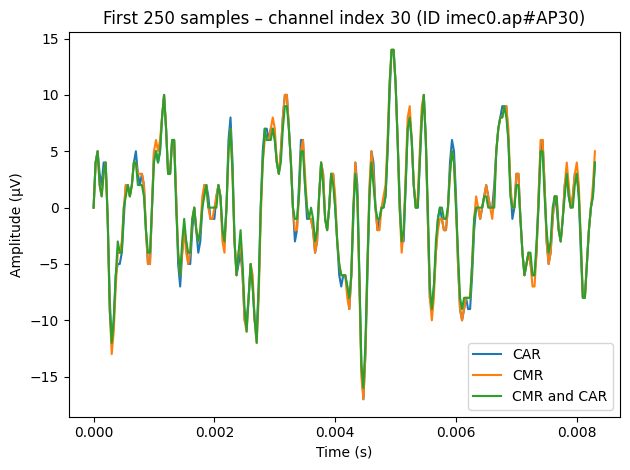

In [4]:
import numpy as np

# Be robust to channel IDs (they aren’t always 0..N-1 in Neuropixels)
ch_ids = raw_rec1.get_channel_ids()
ch_30 = ch_ids[30]          # “channel 30” by index
x = raw_rec1.get_traces(start_frame=0, end_frame=250, channel_ids=[ch_30])[:, 0]  # shape (1000,)
y = recording_car.get_traces(start_frame=0, end_frame=250, channel_ids=[ch_30])[:, 0]  # shape (1000,)
z = recording_cmr.get_traces(start_frame=0, end_frame=250, channel_ids=[ch_30])[:, 0]  # shape (1000,)
w = recording_cmr_car.get_traces(start_frame=0, end_frame=250, channel_ids=[ch_30])[:, 0]

fs = raw_rec1.get_sampling_frequency()
t = np.arange(x.size) / fs

plt.figure()
#plt.plot(t,x, label ="Raw")
plt.plot(t,y, label = "CAR")
plt.plot(t,z, label = "CMR")
plt.plot(t,w, label ="CMR and CAR")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")  # SpikeInterface returns scaled µV by default
plt.title(f"First 250 samples – channel index 30 (ID {ch_30})")
plt.tight_layout()
plt.legend()
plt.show()